[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49. -50. -49. -48. -47. -46. -45.
 -44. -43. -42. -41. -40. -39. -38. -37. -36. -35. -34. -33. -32. -31.
 -30. -29. -28. -27. -26. -25. -24. -23. -22. -21. -20. -19. -18. -17.
 -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.
  -2.  -1.]


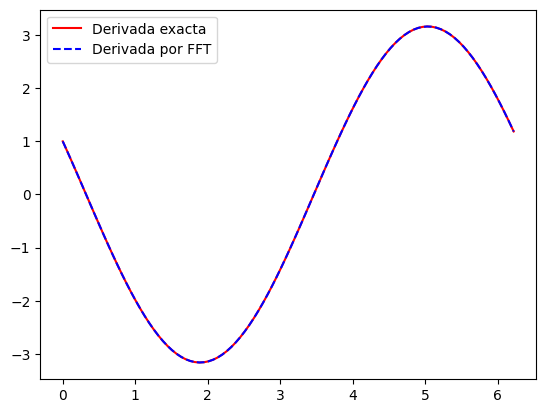

In [1]:
import numpy as np
from scipy.fftpack import fft, ifft, fftshift, fftfreq
import matplotlib.pyplot as plt

N = 100
x = np.linspace(0,2*np.pi,N,endpoint = False)
L = 2*np.pi # => 2np.pi/L = 1 = omega_0
dx = L/N

y = np.sin(x)+3*np.cos(x)
dydx = np.cos(x)-3*np.sin(x)

k = (2*np.pi/L)*np.arange(-N/2, N/2)
k = fftshift(k)
print(k)


dydx_fft = ifft(k*1j*fft(y)).real

plt.plot(x, dydx, label = 'Derivada exacta', c = 'r')
plt.plot(x, dydx_fft, label = 'Derivada por FFT', c = 'b', linestyle = '--')
plt.legend()
plt.show()

In [2]:
v = np.arange(-20,-10)
print(v)
print(np.fft.fftshift(v))

print(np.fft.fftshift(np.fft.fftshift(v)))

[-20 -19 -18 -17 -16 -15 -14 -13 -12 -11]
[-15 -14 -13 -12 -11 -20 -19 -18 -17 -16]
[-20 -19 -18 -17 -16 -15 -14 -13 -12 -11]


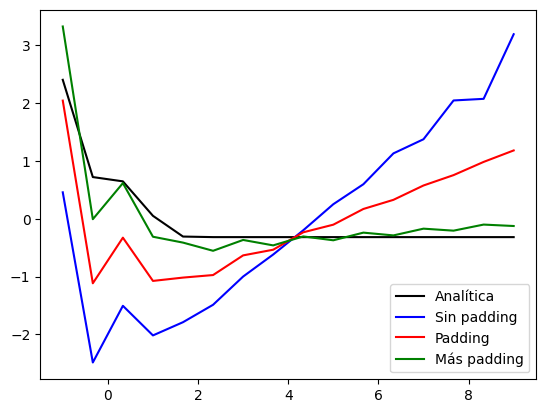

In [18]:
import scipy.special as special

def fft_int(s, dydt, N=0):
    dydt_padded = np.pad(dydt, (0,N))
    f = fftfreq(dydt_padded.shape[0], s)
    F = fft(dydt_padded)
    with np.errstate(divide='ignore', invalid = 'ignore'):
        F = F / (2*np.pi*1j*f)
    F[0] = 0
    y_padded = np.real(ifft(F))
    y = y_padded[0:dydt.shape[0]]
    return y - np.mean(y)

N = 2**4
x = np.linspace(-1, 9, N)
s = x[1] - x[0]

y = np.exp(-x**3)
dy = -3*x**2*np.exp(-x**3)

plt.plot(x,y-np.mean(y), c = 'k', label = 'Analítica')
plt.plot(x,fft_int(s,dy), c = 'b', label = 'Sin padding')
plt.plot(x,fft_int(s,dy,N), c = 'r', label = 'Padding')
plt.plot(x,fft_int(s,dy,10*N), c = 'g', label = 'Más padding')
plt.legend()
plt.show()




